<h1>Walmart Toothpaste Product Analysis<h1>
==============================


In [1]:
import pandas as pd
import os,glob
import re
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.patches as patches
import seaborn as sns
from sklearn.metrics import jaccard_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import ast
import itertools
from numpy.random import randint
# %matplotlib notebook

In [2]:
file = "all_data_3_29_2021_final.csv" # Original File with product + price + ingredients + rdkit featurization 
toJoin = "../data/ingredient/toothpaste_ingredient_overview_no_star.csv"  # Price 

In [3]:
def toRealList(strList):
    """
    Turn list string into literal list of string
    """
    return [ast.literal_eval(i) for i in strList] 

In [4]:
def getManufacturer(productName):
    """
    Get manufacturer from product name
    """
    manu = ["Crest", "Sensodyne","Biotene","Arm & Hammer","Colgate","Tom's","Parodontax", "Hello", "Close-Up"
           ]
    for m in manu:
        if m.lower() in productName.lower():
            return m
    return ""


In [5]:
df = pd.read_csv(file)
df

,Unnamed: 0,Unnamed: 0.1,active_ingredients,inactive_ingredients,name,price,active_smiles,inactive_smiles,HeavyAtomCount,NHOHCount,...,fr_hdrzine,fr_nitro,fr_priamide,fr_imidazole,fr_N_O,fr_imide,fr_sulfone,fr_SH,fr_thiocyan,fr_nitroso
0,0,0,['sodium fluoride'],"['sorbitol','water','hydrated silica','disodiu...","Crest + Scope Complete Whitening Toothpaste, M...",$6.52,['[F-].[Na+]'],"['C(C(C(C(C(CO)O)O)O)O)O','O','O.[O-2].[O-2].[...",279,40,...,0,0,0,0,0,0,0,0,0,0
1,1,1,['sodium monofluorophosphate'],"['dicalcium phosphate dihydrate','water','glyc...",Colgate Cavity Protection Toothpaste with Fluo...,$3.96,['[O-]P(=O)([O-])F.[Na+].[Na+]'],"['O.O.OP(=O)([O-])[O-].[Ca+2]','O','C(C(CO)O)O...",83,16,...,0,0,0,0,0,0,0,0,0,0
2,2,2,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Teeth Whi...",$5.92,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,...,0,0,0,0,0,0,0,0,0,0
3,3,3,['stannous fluoride'],"['water','sorbitol','hydrated silica','glyceri...","Colgate Total Whitening Toothpaste, 4.8 oz. 2-...",$4.96,['F[Sn]F'],"['O','C(C(C(C(C(CO)O)O)O)O)O','O.[O-2].[O-2].[...",285,56,...,0,0,0,0,0,0,0,0,0,0
4,4,4,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Extra Fre...",$5.47,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,610,242,"['glycerin', 'aqua hydrated silica', 'calcium ...",[],"Crest Toothpaste Kids Mickey Strawberry, 4.2 Oz",$13.99,"['C(C(CO)O)O', 'aqua hydrated silica', 'C(=O)(...",[],203,24,...,0,0,0,0,0,0,0,0,0,0
611,611,243,"['glycerin', 'aloe barbadensis leaf juice', 'c...",[],Jason Natural Products Whitening Toothpaste - ...,$5.10,"['C(C(CO)O)O', 'aloe barbadensis leaf juice', ...",[],48,16,...,0,0,0,0,0,0,0,0,0,0
612,612,244,"['purified water', 'xylitol', 'calcium glycero...",[],"Brilliant Kids Toothpaste Gel by Spry, With Xy...",$6.81,"['O', 'C(C(C(C(CO)O)O)O)O', 'C(C(COP(=O)([O-])...",[],39,15,...,0,0,0,0,0,0,0,0,0,0
613,613,245,"['aqua', 'hydrated silica', 'sorbitol', 'glyce...",[],GUM Original White Toothpaste 75ml,$13.99,"['O', 'O.[O-2].[O-2].[Si+4]', 'C(C(C(C(C(CO)O)...",[],206,26,...,0,0,0,0,0,0,0,0,0,0


### Add product id number

In [6]:
df2 = pd.read_csv(toJoin)
df['number'] = df.name.map(df2.set_index('name')['number'].to_dict())
df

,Unnamed: 0,Unnamed: 0.1,active_ingredients,inactive_ingredients,name,price,active_smiles,inactive_smiles,HeavyAtomCount,NHOHCount,...,fr_nitro,fr_priamide,fr_imidazole,fr_N_O,fr_imide,fr_sulfone,fr_SH,fr_thiocyan,fr_nitroso,number
0,0,0,['sodium fluoride'],"['sorbitol','water','hydrated silica','disodiu...","Crest + Scope Complete Whitening Toothpaste, M...",$6.52,['[F-].[Na+]'],"['C(C(C(C(C(CO)O)O)O)O)O','O','O.[O-2].[O-2].[...",279,40,...,0,0,0,0,0,0,0,0,0,547748539.0
1,1,1,['sodium monofluorophosphate'],"['dicalcium phosphate dihydrate','water','glyc...",Colgate Cavity Protection Toothpaste with Fluo...,$3.96,['[O-]P(=O)([O-])F.[Na+].[Na+]'],"['O.O.OP(=O)([O-])[O-].[Ca+2]','O','C(C(CO)O)O...",83,16,...,0,0,0,0,0,0,0,0,0,580400401.0
2,2,2,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Teeth Whi...",$5.92,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,...,0,0,0,0,0,0,0,0,0,143583812.0
3,3,3,['stannous fluoride'],"['water','sorbitol','hydrated silica','glyceri...","Colgate Total Whitening Toothpaste, 4.8 oz. 2-...",$4.96,['F[Sn]F'],"['O','C(C(C(C(C(CO)O)O)O)O)O','O.[O-2].[O-2].[...",285,56,...,0,0,0,0,0,0,0,0,0,831725130.0
4,4,4,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Extra Fre...",$5.47,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,...,0,0,0,0,0,0,0,0,0,125185675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,610,242,"['glycerin', 'aqua hydrated silica', 'calcium ...",[],"Crest Toothpaste Kids Mickey Strawberry, 4.2 Oz",$13.99,"['C(C(CO)O)O', 'aqua hydrated silica', 'C(=O)(...",[],203,24,...,0,0,0,0,0,0,0,0,0,109642706.0
611,611,243,"['glycerin', 'aloe barbadensis leaf juice', 'c...",[],Jason Natural Products Whitening Toothpaste - ...,$5.10,"['C(C(CO)O)O', 'aloe barbadensis leaf juice', ...",[],48,16,...,0,0,0,0,0,0,0,0,0,568286111.0
612,612,244,"['purified water', 'xylitol', 'calcium glycero...",[],"Brilliant Kids Toothpaste Gel by Spry, With Xy...",$6.81,"['O', 'C(C(C(C(CO)O)O)O)O', 'C(C(COP(=O)([O-])...",[],39,15,...,0,0,0,0,0,0,0,0,0,394526073.0
613,613,245,"['aqua', 'hydrated silica', 'sorbitol', 'glyce...",[],GUM Original White Toothpaste 75ml,$13.99,"['O', 'O.[O-2].[O-2].[Si+4]', 'C(C(C(C(C(CO)O)...",[],206,26,...,0,0,0,0,0,0,0,0,0,830941428.0


In [7]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = 1)
df.head(5)


,active_ingredients,inactive_ingredients,name,price,active_smiles,inactive_smiles,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticHeterocycles,...,fr_nitro,fr_priamide,fr_imidazole,fr_N_O,fr_imide,fr_sulfone,fr_SH,fr_thiocyan,fr_nitroso,number
0,['sodium fluoride'],"['sorbitol','water','hydrated silica','disodiu...","Crest + Scope Complete Whitening Toothpaste, M...",$6.52,['[F-].[Na+]'],"['C(C(C(C(C(CO)O)O)O)O)O','O','O.[O-2].[O-2].[...",279,40,98,9,...,0,0,0,0,0,0,0,0,0,547748539.0
1,['sodium monofluorophosphate'],"['dicalcium phosphate dihydrate','water','glyc...",Colgate Cavity Protection Toothpaste with Fluo...,$3.96,['[O-]P(=O)([O-])F.[Na+].[Na+]'],"['O.O.OP(=O)([O-])[O-].[Ca+2]','O','C(C(CO)O)O...",83,16,36,1,...,0,0,0,0,0,0,0,0,0,580400401.0
2,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Teeth Whi...",$5.92,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,33,1,...,0,0,0,0,0,0,0,0,0,143583812.0
3,['stannous fluoride'],"['water','sorbitol','hydrated silica','glyceri...","Colgate Total Whitening Toothpaste, 4.8 oz. 2-...",$4.96,['F[Sn]F'],"['O','C(C(C(C(C(CO)O)O)O)O)O','O.[O-2].[O-2].[...",285,56,120,12,...,0,0,0,0,0,0,0,0,0,831725130.0
4,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Extra Fre...",$5.47,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,33,1,...,0,0,0,0,0,0,0,0,0,125185675.0


In [8]:
df.rename(columns={"name": "product"}, inplace=True)

In [9]:
df.rename(columns={"number": "product_id"}, inplace=True)

### Drop Product With Unknown Price

In [10]:
df.dropna(inplace=True)
df['product_id']= [int(i) for i in df['product_id']]
df = df[df['price'] != "UNKNOWN"]


### Remove the $ Symbol from Price Column

In [11]:
price_list = []

for price in list(df['price']):
    res = re.sub(r"\$+", "", price)
    if res.find(' - ') != -1:
        res = res.split(' - ')
        res = res[0]
        price_list.append(res)
    else:
        price_list.append(res.strip())
print(len(price_list))

df['price'] = [float(i) for i in price_list]
# df['price'] = round(df['price'] / df['pack'],2)


599


### Remove an outlier

In [12]:
df = df[df['price'] != 24.99]
df.reset_index(drop=True, inplace=True)
len(df)

598

### Get the Pack Number from the Product Name

In [13]:
df_copy = df.copy(deep=True)

df_copy['product'] = [i.lower() for i in df_copy['product']]
name_list = df_copy['product'].tolist()
pack_list = []
for i in name_list:
    rs = re.findall(r"\d+-pack|\d+\spack|pack of \d+|\d+\sct|\d+\sCt", i)
    if len(rs) != 0:
        number_rs = re.findall(r'\d+', rs[0])
        pack_list.append(int(number_rs[0]))
    else:
        rs = re.findall(r"twin pack|twin|twinpack", i) 
        if len(rs) != 0:
            pack_list.append(2)
        else:
            df_temp = df_copy[df_copy['product'] == i]
            if float(list(df_temp['price'])[0]) > 14:
                pack_list.append("toFind")
            else:
                pack_list.append(1)
df['pack'] = pack_list
df_pack = df[df['pack'] == "toFind"]
# df_pack.to_csv('findPack.csv')
len(df)

598

### Get Separate CSV with Pack Numbers that Were Manually Curated

In [14]:
df_with_pack = df[df["pack"] != "toFind"]
df_no_pack = pd.read_csv("findPack.csv")
df_no_pack = df_no_pack[df_no_pack['pack'] != "toFind"]
df = pd.concat([df_with_pack, df_no_pack])
df.reset_index(inplace=True)
len(df)

598

### Get Oz Number from Product Name

In [15]:
oz_list = []

for oz in name_list:
    rs_num = re.findall(r'\d+\sfl\sml|\d\.\d\-ounce|\d\-ounce|\d\sounce|\s\d\sounce|\d\soz|\d\.\d+\soz|\doz|\d\sounces|\d\.\d+\sounces|\d\.\d+\sounce|\d\.\d+ounces|\d\.\d+ounce|\dounce|\dounces|\d+ml|\d+\sml|^\d\sounce|^\d\.\d+\sounce|\d\.0oz|\d\.0\soz', oz)

#     print(rs_num)
    if len(rs_num) != 0:
        if bool(re.search(r'^\d\soz|^\d\soz|^\d\sounce|^\doz|^\d\sounces|^\dounce|^\dounces|\s\d\sounce|\d\-ounce', rs_num[0])):
            rs_int = re.findall(r'\d', rs_num[0])
#             print(rs_int)
            oz_list.append(int(rs_int[0]))
        elif bool(re.search(r'^\d\.0oz|^\d\.0\soz|^\d\.\d+\soz|^\d\.\d+oz|^\d\.\d+\sounces|^\d\.\d+ounce|^\d\.\d+ounces|^\d\.\d+\sounce|^\d\.\d\-ounce', rs_num[0])):
            rs_float = re.findall(r'^\d\.\d+', rs_num[0])
            oz_list.append(float(rs_float[0]))
        elif bool(re.search(r'^\d+ml|^\d+\sml|^\d+\sfl\sml', rs_num[0])):
            rs_ml = re.findall(r'^\d+', rs_num[0])
            oz_list.append(round(int(rs_ml[0])/29.574,2))
        else:
            print(rs_num[0])
    else:
#         print(rs_num)
        oz_list.append("toFind")

df['oz'] = oz_list
# df.to_csv("withOz.csv")
#         if re.search(r'\d\.\d+', rs_num[0]) != None:
#             os.

### Get Separate CSV with Oz Numbers that Were Manually Curated


In [16]:
df_no_oz = df[df["oz"] != "toFind"]
df_fill_oz = pd.read_csv("noOz.csv")
df_fill_oz = df_fill_oz[df_fill_oz['oz'] != "toFind"]
df = pd.concat([df_no_oz, df_fill_oz])
df.reset_index(inplace=True, drop=True)


In [17]:
# df = df.drop(["Unnamed: 0"], axis = 1)
real_active = toRealList(list(df['active_ingredients']))
print("length active", len(real_active))

real_inactive = toRealList(list(df['inactive_ingredients']))
print("length inactive", len(real_inactive))

length active 590
length inactive 590


In [18]:
flat= []
final_list = []
for active, inactive in zip(real_active, real_inactive):
    flat.append(list(itertools.chain.from_iterable([active,inactive])))

df['all_ingredients'] = flat
df.head(5)


,index,active_ingredients,inactive_ingredients,product,price,active_smiles,inactive_smiles,HeavyAtomCount,NHOHCount,NOCount,...,fr_imide,fr_sulfone,fr_SH,fr_thiocyan,fr_nitroso,product_id,pack,Unnamed: 0,oz,all_ingredients
0,0.0,['sodium fluoride'],"['sorbitol','water','hydrated silica','disodiu...","Crest + Scope Complete Whitening Toothpaste, M...",6.52,['[F-].[Na+]'],"['C(C(C(C(C(CO)O)O)O)O)O','O','O.[O-2].[O-2].[...",279,40,98,...,0,0,0,0,0,547748539,3,NaN,5.4,"[sodium fluoride, sorbitol, water, hydrated si..."
1,1.0,['sodium monofluorophosphate'],"['dicalcium phosphate dihydrate','water','glyc...",Colgate Cavity Protection Toothpaste with Fluo...,3.96,['[O-]P(=O)([O-])F.[Na+].[Na+]'],"['O.O.OP(=O)([O-])[O-].[Ca+2]','O','C(C(CO)O)O...",83,16,36,...,0,0,0,0,0,580400401,3,NaN,6,"[sodium monofluorophosphate, dicalcium phospha..."
2,2.0,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Teeth Whi...",5.92,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,33,...,0,0,0,0,0,143583812,1,NaN,3.4,"[stannous fluoride, glycerin, peg-8, hydrated ..."
3,3.0,['stannous fluoride'],"['water','sorbitol','hydrated silica','glyceri...","Colgate Total Whitening Toothpaste, 4.8 oz. 2-...",4.96,['F[Sn]F'],"['O','C(C(C(C(C(CO)O)O)O)O)O','O.[O-2].[O-2].[...",285,56,120,...,0,0,0,0,0,831725130,2,NaN,4.8,"[stannous fluoride, water, sorbitol, hydrated ..."
4,4.0,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Extra Fre...",5.47,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,33,...,0,0,0,0,0,125185675,1,NaN,3.4,"[stannous fluoride, glycerin, peg-8, hydrated ..."


In [19]:
df['manufacturer'] = df['product'].apply(lambda x: getManufacturer(x))
df.head(5)

,index,active_ingredients,inactive_ingredients,product,price,active_smiles,inactive_smiles,HeavyAtomCount,NHOHCount,NOCount,...,fr_sulfone,fr_SH,fr_thiocyan,fr_nitroso,product_id,pack,Unnamed: 0,oz,all_ingredients,manufacturer
0,0.0,['sodium fluoride'],"['sorbitol','water','hydrated silica','disodiu...","Crest + Scope Complete Whitening Toothpaste, M...",6.52,['[F-].[Na+]'],"['C(C(C(C(C(CO)O)O)O)O)O','O','O.[O-2].[O-2].[...",279,40,98,...,0,0,0,0,547748539,3,NaN,5.4,"[sodium fluoride, sorbitol, water, hydrated si...",Crest
1,1.0,['sodium monofluorophosphate'],"['dicalcium phosphate dihydrate','water','glyc...",Colgate Cavity Protection Toothpaste with Fluo...,3.96,['[O-]P(=O)([O-])F.[Na+].[Na+]'],"['O.O.OP(=O)([O-])[O-].[Ca+2]','O','C(C(CO)O)O...",83,16,36,...,0,0,0,0,580400401,3,NaN,6,"[sodium monofluorophosphate, dicalcium phospha...",Colgate
2,2.0,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Teeth Whi...",5.92,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,33,...,0,0,0,0,143583812,1,NaN,3.4,"[stannous fluoride, glycerin, peg-8, hydrated ...",Parodontax
3,3.0,['stannous fluoride'],"['water','sorbitol','hydrated silica','glyceri...","Colgate Total Whitening Toothpaste, 4.8 oz. 2-...",4.96,['F[Sn]F'],"['O','C(C(C(C(C(CO)O)O)O)O)O','O.[O-2].[O-2].[...",285,56,120,...,0,0,0,0,831725130,2,NaN,4.8,"[stannous fluoride, water, sorbitol, hydrated ...",Colgate
4,4.0,['stannous fluoride'],"['glycerin','peg-8','hydrated silica','pentaso...","Parodontax Bleeding Gums Toothpaste, Extra Fre...",5.47,['F[Sn]F'],"['C(C(CO)O)O','peg-8','O.[O-2].[O-2].[Si+4]','...",94,7,33,...,0,0,0,0,125185675,1,NaN,3.4,"[stannous fluoride, glycerin, peg-8, hydrated ...",Parodontax


In [20]:

df['manufacturer'].replace("", "Others", inplace=True)

df[df['manufacturer'] == ""]

,index,active_ingredients,inactive_ingredients,product,price,active_smiles,inactive_smiles,HeavyAtomCount,NHOHCount,NOCount,...,fr_sulfone,fr_SH,fr_thiocyan,fr_nitroso,product_id,pack,Unnamed: 0,oz,all_ingredients,manufacturer


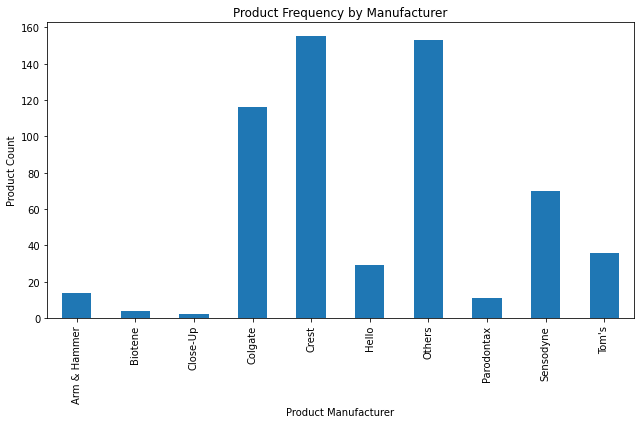

In [21]:
f, ax = plt.subplots(figsize=(9,6))
ax.set_title("Product Frequency by Manufacturer")
ax.set_xlabel("Product Manufacturer")
ax.set_ylabel("Product Count")
df.manufacturer.value_counts().sort_index().plot(kind='bar')
plt.tight_layout()

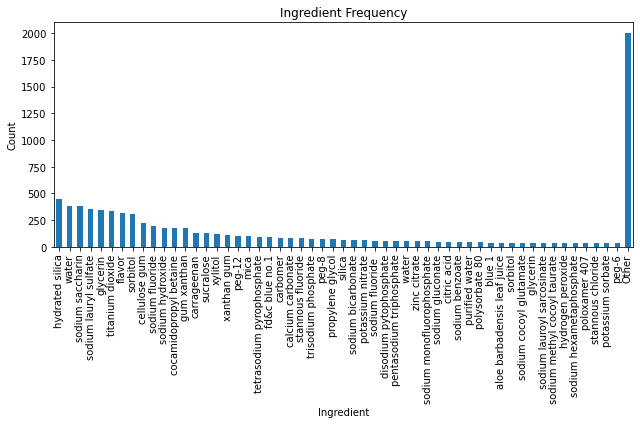

In [22]:
df_ingredients = df[['product_id', 'all_ingredients']]
df2 = (df_ingredients.set_index(['product_id'])
   .apply(lambda x: x.explode())).reset_index()

# plt.figure(figsize=(8,6))
vc = df2.all_ingredients.value_counts()
mask = vc > 30
tail = vc.loc[~mask].sum()
vc = vc.loc[mask]
vc['Other'] = tail

f, ax = plt.subplots(figsize=(9,6))
ax.set_title("Ingredient Frequency")
ax.set_xlabel("Ingredient")
ax.set_ylabel("Count")
vc.plot(kind='bar')
# df2.ingredients.value_counts().plot(kind='bar')
plt.tight_layout()

In [23]:


tmp = pd.crosstab(df2.product_id, df2.all_ingredients).join(df[['product_id','product']].set_index('product_id'))
tmp['Name'] = tmp['product'].apply(lambda x: str(x)[:10])
tmp = tmp.reset_index().drop(columns=['product']).set_index('Name').drop(columns=['product_id']).sort_index()
# tmp.to_csv('test_what.csv')


### HeatMap

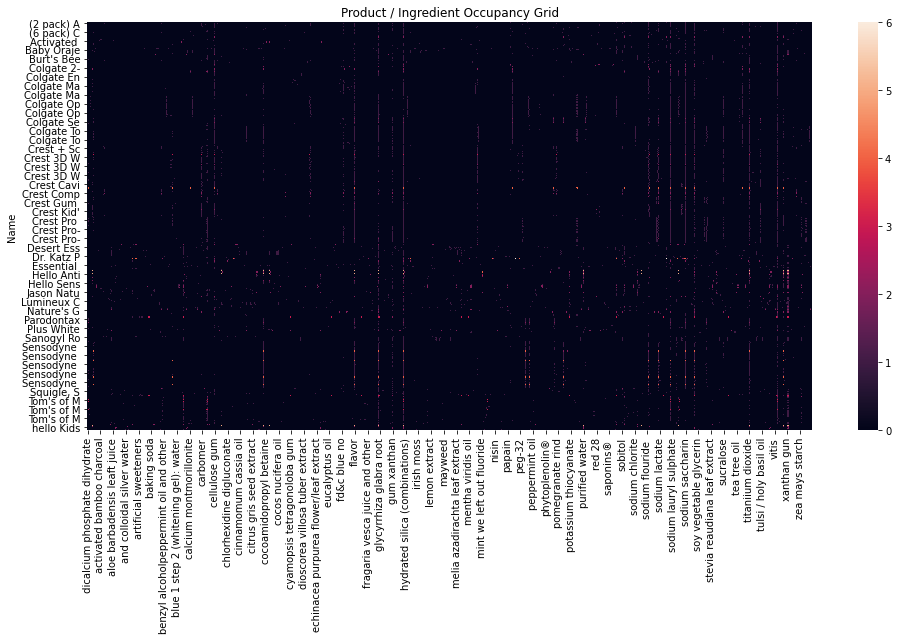

In [25]:
# %matplotlib notebook
f, ax = plt.subplots(figsize=(14,9))
ax.set_title("Product / Ingredient Occupancy Grid")
ax.set_xlabel("Ingredient")
ax.set_ylabel("Product Name")
# sns.color_palette("YlOrBr")
sns.heatmap(tmp, ax=ax, cmap="rocket")
plt.tight_layout()

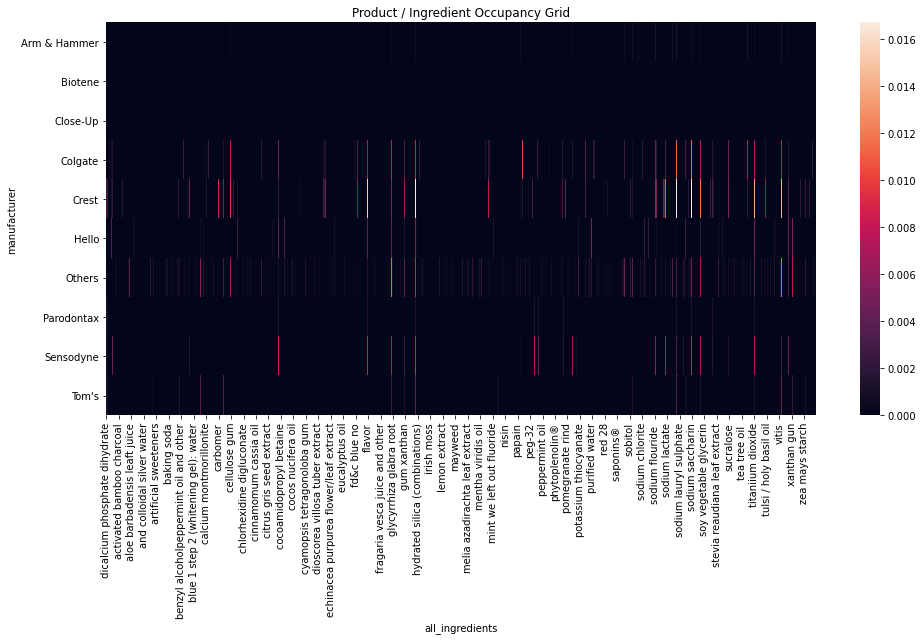

In [26]:

df3 = df2.set_index('product_id').join(df[['product_id','manufacturer', 'product']].set_index('product_id')).dropna()
# df3.to_csv("test_heat_map.csv")
f, ax = plt.subplots(figsize=(14, 9))
ax.set_title("Product / Ingredient Occupancy Grid")
ax.set_xlabel("Ingredient")
ax.set_ylabel("Manufacturer")
sns.heatmap(pd.crosstab(df3.manufacturer, df3.all_ingredients, normalize=True).sort_index(), ax=ax)
plt.tight_layout()
plt.savefig("Heatmap_manufacterer_ingredients.png")


In [27]:
df3

,all_ingredients,manufacturer,product
product_id,,,
3392,potassium nitrate,Sensodyne,"Sensodyne Sensitivity Toothpaste, Extra Whiten..."
3392,sodium fluoride,Sensodyne,"Sensodyne Sensitivity Toothpaste, Extra Whiten..."
3392,water,Sensodyne,"Sensodyne Sensitivity Toothpaste, Extra Whiten..."
3392,hydrated silica,Sensodyne,"Sensodyne Sensitivity Toothpaste, Extra Whiten..."
3392,sorbitol,Sensodyne,"Sensodyne Sensitivity Toothpaste, Extra Whiten..."
...,...,...,...
994057436,wintergreen oil,Others,Essential Oxygen - BR Organic Toothpaste Fresh...
994057436,eucalyptus leaf oil,Others,Essential Oxygen - BR Organic Toothpaste Fresh...
994057436,frankinscence oil,Others,Essential Oxygen - BR Organic Toothpaste Fresh...


## Ingredient Dimensional Reduction Analysis
The following plot shows the Ingredient Feature Space reduced to two dimensions utilizing the t-distributed Stochastic Neighbor Embedding manifold. For more information on this techinque please see [SkLearn tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [28]:
import numpy as np
from sklearn.manifold import TSNE
tmp = pd.crosstab(df2.product_id, df2.all_ingredients)
X = np.array(np.array(tmp, dtype=float))
# X_embedded = TSNE(n_components=2, perplexity=30, early_exaggeration=25).fit_transform(X)
X_embedded = TSNE(random_state=1, n_components=2, perplexity=10, early_exaggeration=45).fit_transform(X)

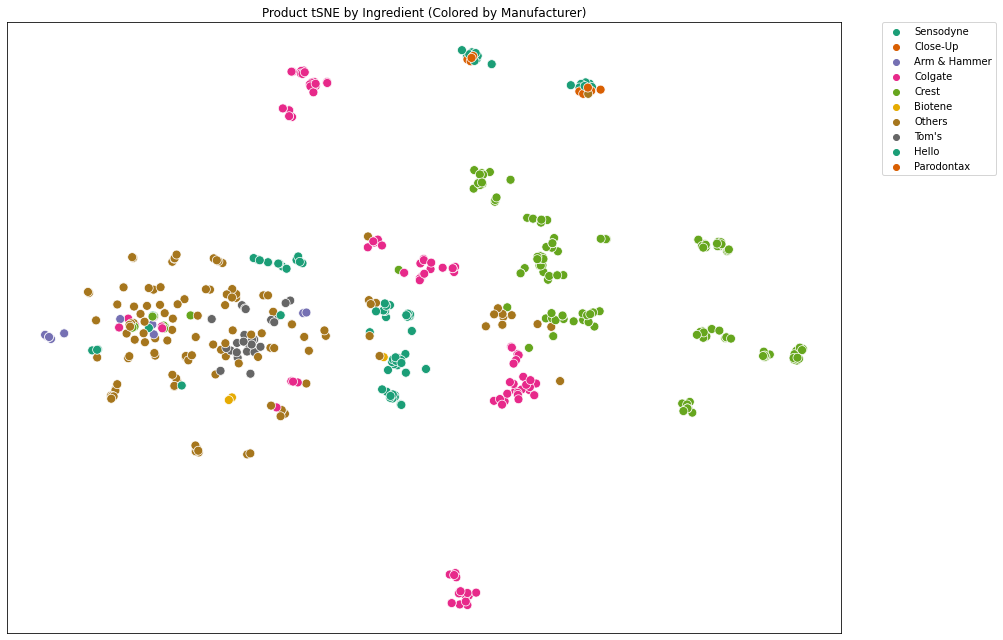

In [29]:
# Colored by Manufacturer
manuMap = df[['product_id','manufacturer']].set_index("product_id").to_dict()['manufacturer']
# starMap = df[['product_id','avg_star_rating']].set_index("product_id").to_dict()['avg_star_rating']

xdf = pd.DataFrame(X_embedded, columns=['tsneX','tsneY'])
xdf['product_id'] = tmp.index
xdf['manufacturer'] = xdf.product_id.apply(lambda x: manuMap[x])
# xdf['star_rating'] = xdf.product_id.apply(lambda x: starMap[x])
# 
f, ax = plt.subplots(figsize=(14,9))
ax.set_title("Product tSNE by Ingredient (Colored by Manufacturer)")
g = sns.scatterplot(x='tsneX', y='tsneY', hue='manufacturer', data=xdf, ax=ax, s=80, palette="Dark2") 
g.set(xticklabels=[], yticklabels=[], xlabel="", ylabel="")
g.tick_params(axis='both', which='both', length=0)
# rect = patches.Rectangle((50,-50),72,150,linewidth=1,edgecolor='g',facecolor='none')

# Add the patch to the Axes
# ax.add_patch(rect)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set(facecolor = "white")
# ax.set_zticks([])
plt.tight_layout()
plt.savefig("Cluster_ingredient_manufacterer_3.png")
# df

In [30]:
tmp

all_ingredients,dicalcium phosphate dihydrate,glycerin,hydrated silica,propylene glycol,sodium bicarbonate (baking soda),sorbitol,water,20,acacia arabica bark,acacia arabica bark extract,...,zinc citrate,zinc citrate cocomidopropyl betaine,zinc citrate trihydrate,zinc gluconate,zinc lactate,zinc oxide,zinc pca,zinc phosphate,zingiber officinale root extract,zylitol
product_id,,,,,,,,,,,,,,,,,,,,,
3392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
200915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208352,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976239158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
980387277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
980521313,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
from matplotlib import cm
def grapher(actual, predicted, r2, rmse):
    plt.rcParams['figure.figsize'] = [12, 9]
    plt.style.use('bmh')
    fig, ax = plt.subplots()
#     norm = cm.colors.Normalize(vmax=pred_std.max(), vmin=pred_std.min())
    x = actual
    y = predicted
    plt.scatter(x, y,alpha=0.7)
#     cbar = plt.colorbar()
#     cbar.set_label("Uncertainty")

    # set axis limits
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),
            np.max([ax.get_xlim(), ax.get_ylim()])
            ]

    # TODO: add histograms on axes
    # # definitions for the axes
    # left, width = 0.1, 0.65
    # bottom, height = 0.1, 0.65
    # spacing = 0.005
    # rect_histx = [left, bottom + height + spacing, width, 0.2]
    # rect_histy = [left + width + spacing, bottom, 0.2, height]
    # ax_histx = plt.axes()
    # ax_histx.tick_params(direction='in', labelbottom=False)
    # ax_histy = plt.axes()
    # ax_histy.tick_params(direction='in', labelleft=False)
    # binwidth = 0.025
    # lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
    # bins = np.arange(-lim, lim + binwidth, binwidth)
    # ax_histx.hist(x, bins=bins)
    # ax_histy.hist(y, bins=bins, orientation='horizontal')

    # ax_histx.set_xlim(ax_scatter.get_xlim())
    # ax_histy.set_ylim(ax_scatter.get_ylim())
    # ------------------------------------------------

    # ax = plt.axes()
    plt.xlabel('True', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)

    plt.title('Predicted vs. Actual')

    plt.plot(lims, lims, 'k-', label='y=x')
    plt.plot([], [], ' ', label='R^2 = %.3f' % r2)
    plt.plot([], [], ' ', label='RMSE = %.3f' % rmse)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    # plt.axis([-2,5,-2,5]) #[-2,5,-2,5]
    ax.legend(prop={'size': 16}, facecolor='w', edgecolor='k', shadow=True)

#     fig.patch.set_facecolor('blue')  # Will change background color
#     fig.patch.set_alpha(0.0)  # Makes background transparent

# Price Model with Only Ingredients and Manufacturers
The next section utilizes a GradientBoostingRegressor model to attempt to learn the price for a product based on its Manufacturer as well as the product ingredients.  

In [22]:
df2 = df[['product_id', 'all_ingredients']]

# df2.to_csv("df_pre_01.csv")
df2 = (df2.set_index(['product_id'])
   .apply(lambda x: x.explode())).reset_index()

df2 = df2.set_index('product_id').join(df[['product_id','manufacturer','price']].set_index('product_id')).dropna()
# df2.ingredients = df2.ingredients.str.strip()
df2 = df2[df2['price'] != "UNKNOWN"].drop(columns=['price'])
df2

,all_ingredients,manufacturer
product_id,,
3392,potassium nitrate,Sensodyne
3392,sodium fluoride,Sensodyne
3392,water,Sensodyne
3392,hydrated silica,Sensodyne
3392,sorbitol,Sensodyne
...,...,...
994057436,wintergreen oil,Others
994057436,eucalyptus leaf oil,Others
994057436,frankinscence oil,Others


In [23]:
# Creating a Feature Set and Feature List (Names of Features)
priceMap = df[['product_id','price']].set_index("product_id").to_dict()['price']
features = pd.get_dummies(df2).reset_index()  # Generate binary data for product ingredient and manufacturers
features.drop_duplicates(subset=['product_id'], inplace=True)
labels = np.array(features['product_id'].apply(lambda x: float(priceMap[x])))
features['price'] = labels
features.drop(['price'], axis=1, inplace=True)  # Remove Price from Featues
# features.to_csv("hyper_tune_non_norm_manufacterer.csv")

features = features.set_index('product_id')
feature_list = list(features.columns)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = randint(low=1, high=50))
features


,all_ingredients_ dicalcium phosphate dihydrate,all_ingredients_ glycerin,all_ingredients_ hydrated silica,all_ingredients_ propylene glycol,all_ingredients_ sodium bicarbonate (baking soda),all_ingredients_ sorbitol,all_ingredients_ water,all_ingredients_20,all_ingredients_acacia arabica bark,all_ingredients_acacia arabica bark extract,...,manufacturer_Arm & Hammer,manufacturer_Biotene,manufacturer_Close-Up,manufacturer_Colgate,manufacturer_Crest,manufacturer_Hello,manufacturer_Others,manufacturer_Parodontax,manufacturer_Sensodyne,manufacturer_Tom's
product_id,,,,,,,,,,,,,,,,,,,,,
3392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
200915,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
208352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
217705,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
238133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976239158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
980387277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
980521313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<h2> GradientBoosting <h2>

In [28]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

108

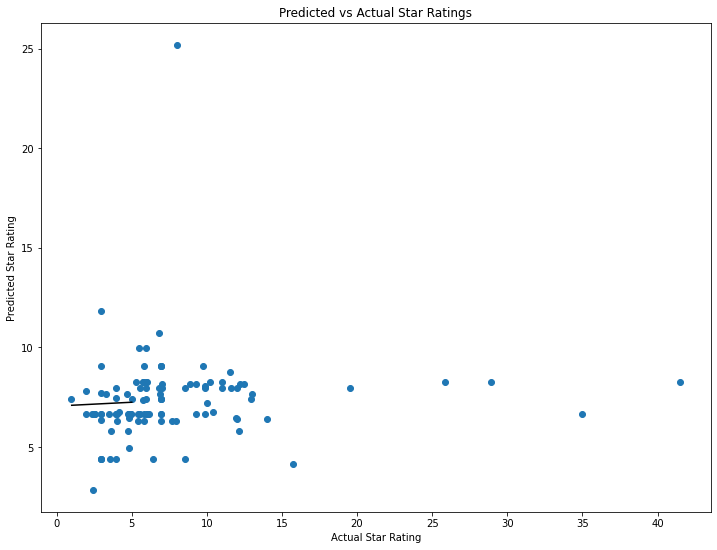

In [29]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
f, ax = plt.subplots(figsize=(12,9))
ax.set_title("Predicted vs Actual Star Ratings")
ax.set_xlabel("Actual Star Rating")
ax.set_ylabel("Predicted Star Rating")

ax.scatter(test_labels, predictions)
ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)



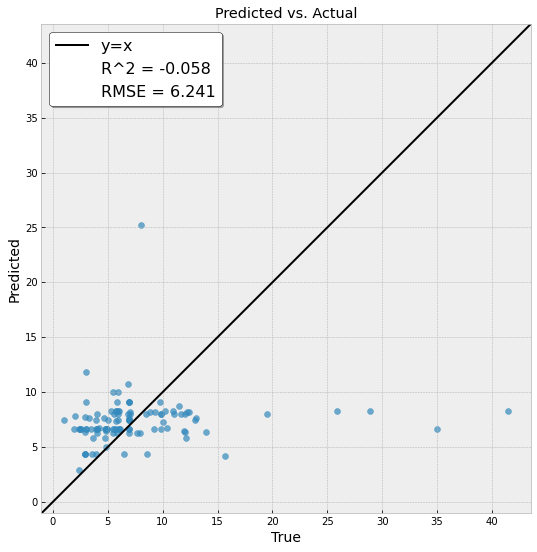

In [30]:
grapher(test_labels, predictions, r2, rmse)

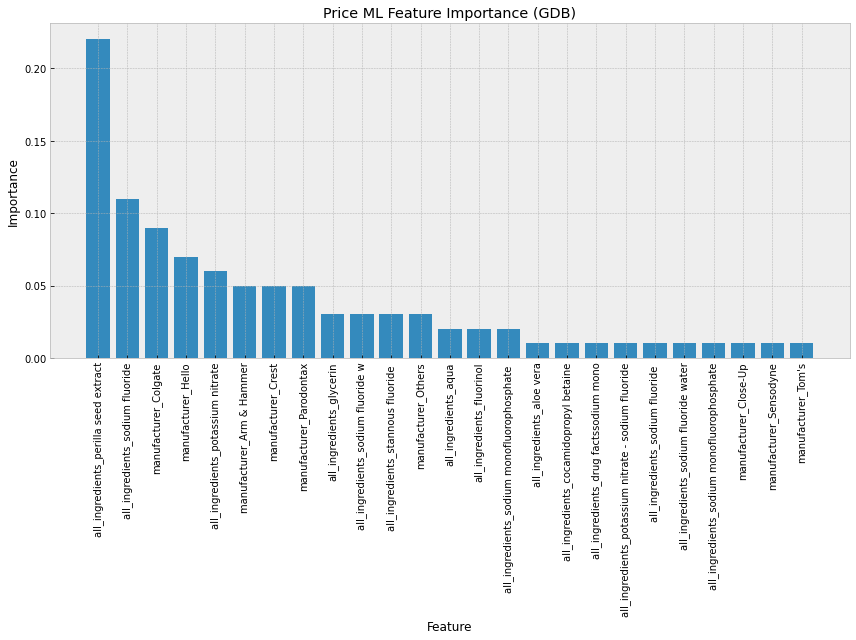

In [31]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.savefig("price_ingredient_manufacturer_importance.png")

plt.tight_layout()

# Price Model with Featurization Only


In [32]:
# Remove all non-ingredient features
df_ingre_no_oz = df.drop(['active_ingredients', 'inactive_ingredients', 'product',
                         'active_smiles', 'inactive_smiles','product_id','Unnamed: 0',
                         'all_ingredients', 'manufacturer', 'index', 'oz', 'pack'], axis=1) 


In [39]:
target = np.array(df_ingre_no_oz['price'])
features = df_ingre_no_oz.drop(['price'], axis=1)
feature_list = list(features.columns)
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = randint(low=1, high=50))


In [40]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

118

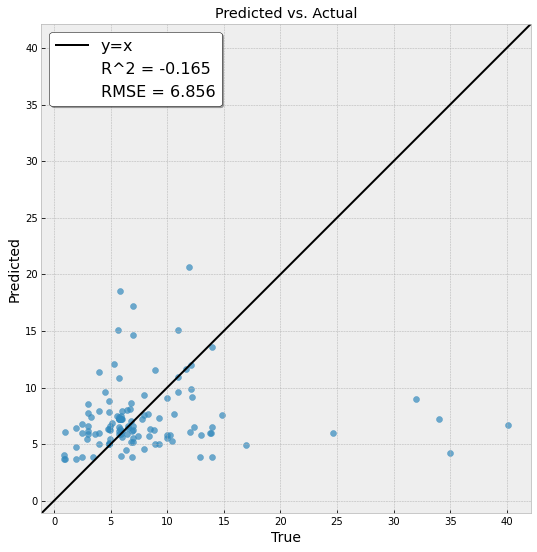

In [41]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

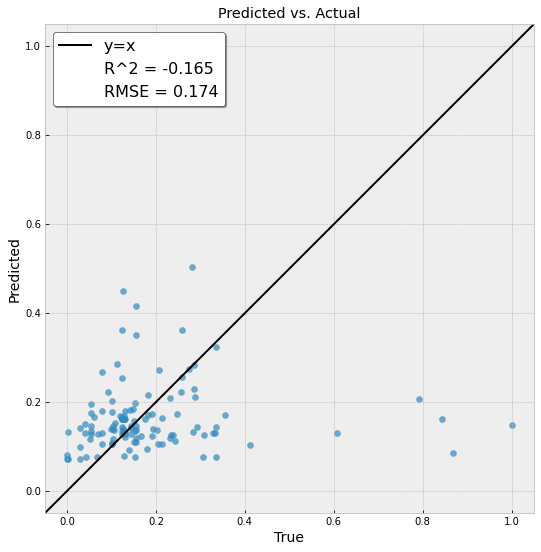

In [42]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
diction = {'actual': test_labels, "pred": predictions}
pva = pd.DataFrame.from_dict(diction)

data_max = max(pva.max())  # Find abs min/max of predicted data
data_min = min(pva.min())

    # Logic to scale the predicted data, using min/max scaling
pva = (pva - data_min) / (data_max - data_min)

r2 = r2_score(pva['actual'], pva['pred'])
rmse = np.sqrt(mean_squared_error(pva['actual'], pva['pred']))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(pva['actual'], pva['pred'], r2, rmse)

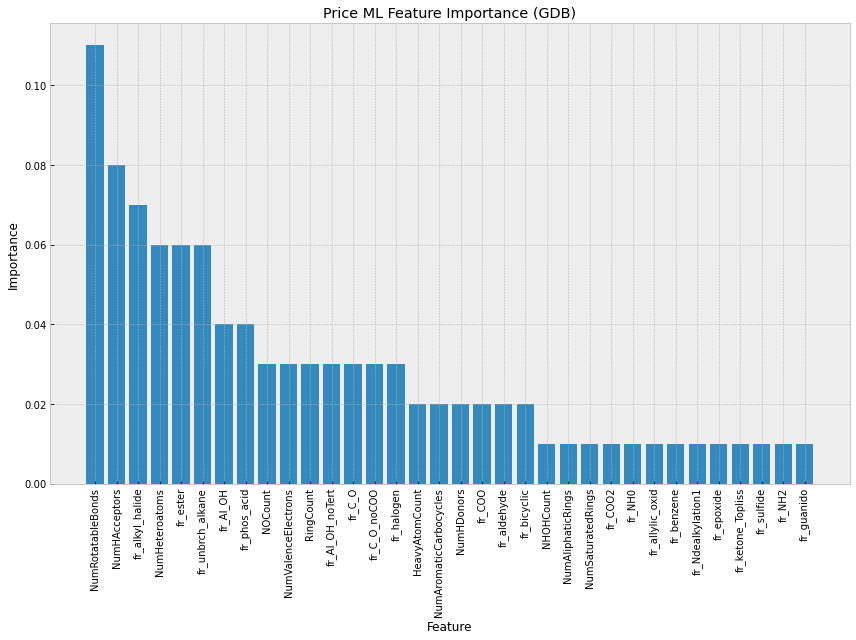

In [43]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()

# Price Model with Only Featurization W/ Oz + Pack


In [44]:
df.columns

Index(['index', 'active_ingredients', 'inactive_ingredients', 'product',
       'price', 'active_smiles', 'inactive_smiles', 'HeavyAtomCount',
       'NHOHCount', 'NOCount', 'NumAliphaticHeterocycles', 'NumAliphaticRings',
       'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings',
       'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons',
       'NumRotatableBonds', 'NumSaturatedHeterocycles', 'NumSaturatedRings',
       'NumValenceElectrons', 'RingCount', 'fr_Al_COO', 'fr_Al_OH',
       'fr_Al_OH_noTert', 'fr_Ar_COO', 'fr_Ar_N', 'fr_COO', 'fr_COO2',
       'fr_C_O', 'fr_C_O_noCOO', 'fr_NH0', 'fr_aldehyde', 'fr_allylic_oxid',
       'fr_amide', 'fr_aniline', 'fr_aryl_methyl', 'fr_azo', 'fr_benzene',
       'fr_bicyclic', 'fr_ester', 'fr_ether', 'fr_halogen', 'fr_hdrzone',
       'fr_phos_acid', 'fr_pyridine', 'fr_sulfonamd', 'fr_unbrch_alkane',
       'fr_NH1', 'fr_Ndealkylation1', 'fr_quatN', 'fr_alkyl_halide',
       'NumAliphaticCarbocycles',

In [45]:
df_ingre_only = df.drop(['active_ingredients', 'inactive_ingredients', 'product',
                         'active_smiles', 'inactive_smiles','product_id','Unnamed: 0',
                         'all_ingredients', 'manufacturer', 'index'], axis=1)
df_ingre_only.to_csv("hyper_tune_data.csv")

In [46]:
target = np.array(df_ingre_only['price'])
features = df_ingre_only.drop(['price'], axis=1)
feature_list = list(features.columns)
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = randint(low=1, high=50))
test_labels

array([ 6.19 ,  5.98 ,  3.96 ,  9.58 ,  5.92 ,  2.77 ,  5.1  ,  2.   ,
       10.24 ,  8.96 ,  3.96 ,  6.43 , 12.11 ,  4.97 , 12.18 ,  3.92 ,
        9.62 ,  2.97 ,  0.85 , 10.49 ,  3.96 , 10.97 ,  9.62 ,  6.97 ,
       15.475,  5.92 ,  0.98 ,  9.97 , 11.94 ,  3.92 ,  6.97 ,  5.79 ,
        1.67 ,  1.96 , 13.61 ,  5.92 , 13.25 ,  8.85 ,  4.82 ,  4.79 ,
        4.97 ,  6.33 , 15.7  ,  3.88 ,  7.96 ,  0.97 ,  7.64 ,  4.93 ,
       10.25 ,  2.58 , 11.44 , 10.6  , 10.98 ,  5.81 ,  3.29 ,  5.72 ,
        3.97 ,  3.92 ,  3.96 , 17.   ,  2.97 , 12.11 ,  6.96 ,  4.79 ,
        1.67 ,  5.36 ,  8.58 ,  2.99 ,  9.25 ,  9.88 ,  3.33 ,  6.99 ,
        5.53 ,  3.99 , 10.98 , 10.49 ,  2.88 ,  1.96 , 24.69 ,  4.83 ,
        3.12 , 10.38 ,  8.96 ,  1.47 ,  4.82 ,  5.72 ,  1.96 , 12.99 ,
        4.82 ,  1.96 ,  8.56 ,  2.5  , 11.89 ,  5.72 ,  1.67 , 10.01 ,
        3.44 ,  8.59 ,  8.85 ,  4.98 ,  4.74 , 11.38 ,  8.34 ,  9.97 ,
        3.99 , 10.02 ,  3.5  ,  1.97 ,  7.08 , 39.61 ,  5.33 , 10.24 ,
      

In [47]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

118

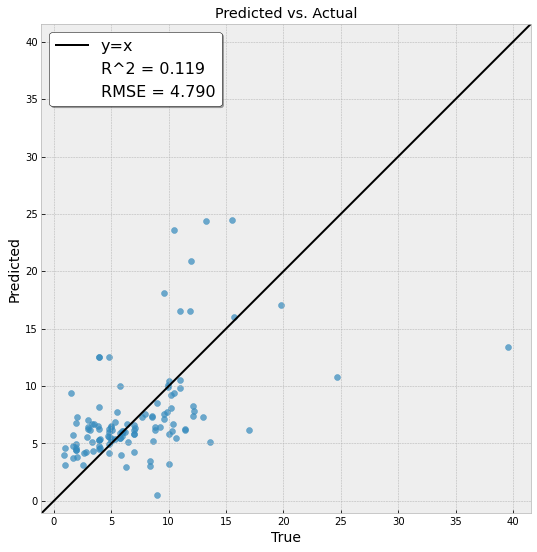

In [48]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

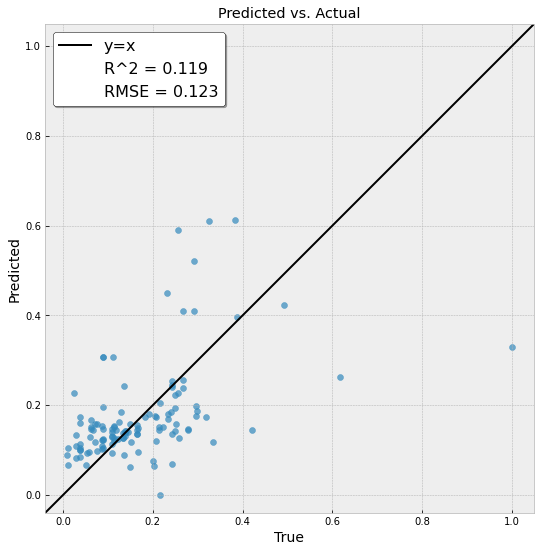

In [49]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
diction = {'actual': test_labels, "pred": predictions}
pva = pd.DataFrame.from_dict(diction)

data_max = max(pva.max())  # Find abs min/max of predicted data
data_min = min(pva.min())

    # Logic to scale the predicted data, using min/max scaling
pva = (pva - data_min) / (data_max - data_min)

r2 = r2_score(pva['actual'], pva['pred'])
rmse = np.sqrt(mean_squared_error(pva['actual'], pva['pred']))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(pva['actual'], pva['pred'], r2, rmse)

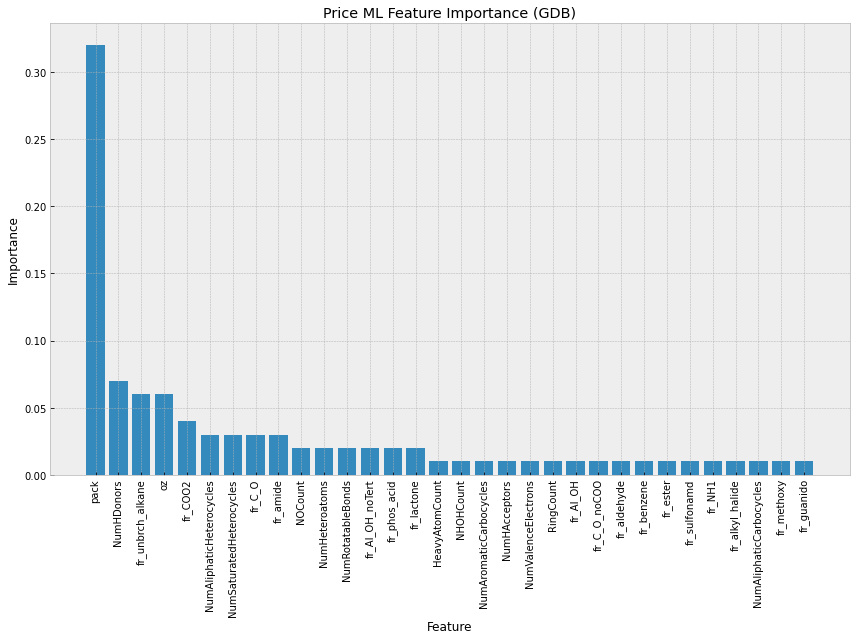

In [50]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()

# Price Model with Featurization + Oz + Pack Pandas Normalized


In [51]:
target = np.array(df_ingre_only['price'])
features = df_ingre_only.drop(['price'], axis=1)
feature_list = list(features.columns)
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = randint(low=1, high=50))



In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(np.array(train_features))
test_features = scaler.transform(test_features)

In [53]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

118

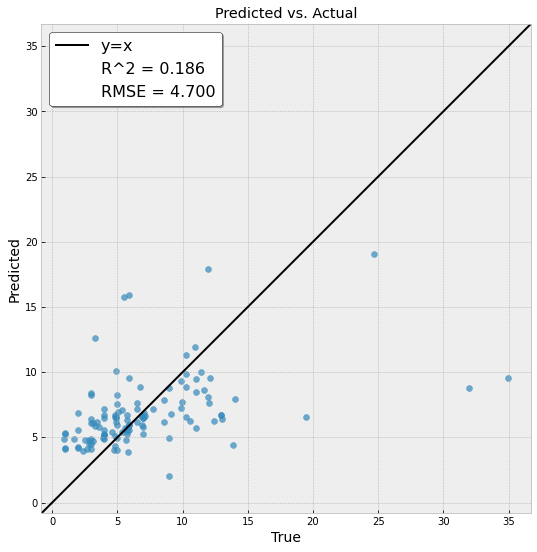

In [54]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

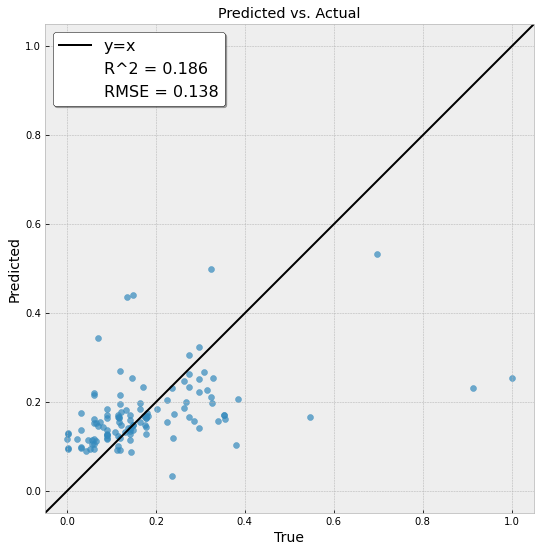

In [55]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
diction = {'actual': test_labels, "pred": predictions}
pva = pd.DataFrame.from_dict(diction)

data_max = max(pva.max())  # Find abs min/max of predicted data
data_min = min(pva.min())

    # Logic to scale the predicted data, using min/max scaling
pva = (pva - data_min) / (data_max - data_min)

r2 = r2_score(pva['actual'], pva['pred'])
rmse = np.sqrt(mean_squared_error(pva['actual'], pva['pred']))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(pva['actual'], pva['pred'], r2, rmse)

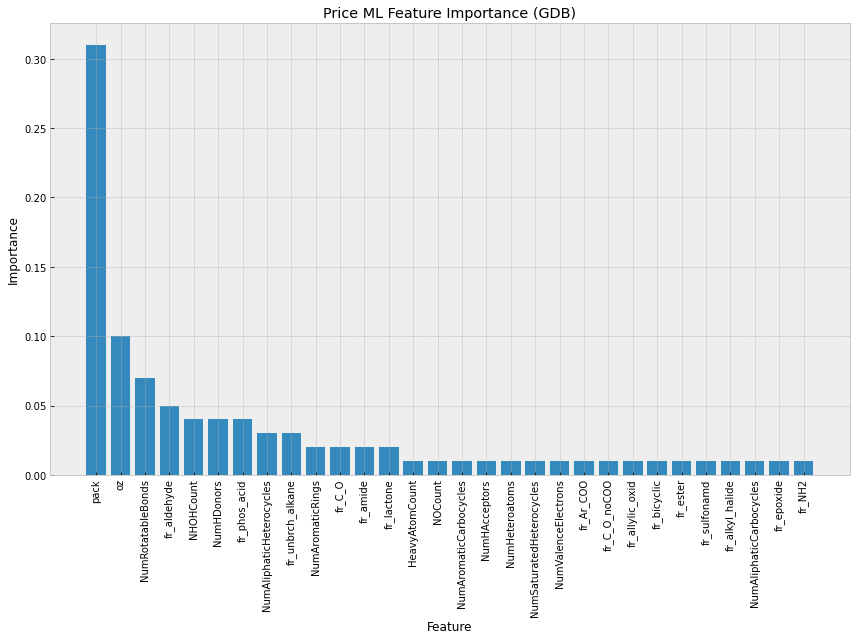

In [56]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()

# Price Model with Only Featurization Oz Normalized


In [57]:
df_ingre_only = df.drop(['active_ingredients', 'inactive_ingredients', 'product',
                         'active_smiles', 'inactive_smiles','product_id','Unnamed: 0',
                         'all_ingredients', 'manufacturer', 'index'], axis=1)
df_ingre_only['oz'] = [float(i) for i in df_ingre_only['oz']]
oz_array = np.array(df_ingre_only['oz'])

oz_std = (oz_array - oz_array.min()) / (oz_array.max() -oz_array.min() )
pack = np.array(df_ingre_only['pack'])

In [58]:
target = np.array(df_ingre_only['price'])
features = df_ingre_only.drop(['price'], axis=1)
for col in features:
    features[col] = df_ingre_only[col]*oz_std

df_ingre_only['oz'] = oz_std
df_ingre_only['pack'] = pack
feature_list = list(features.columns)
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = randint(low=1, high=50))


In [59]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

118

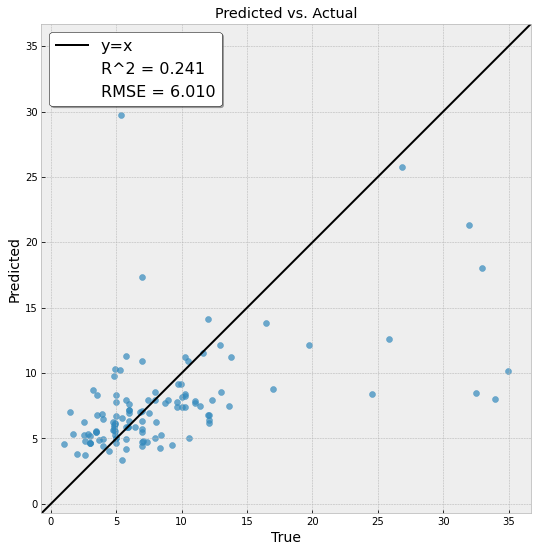

In [60]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

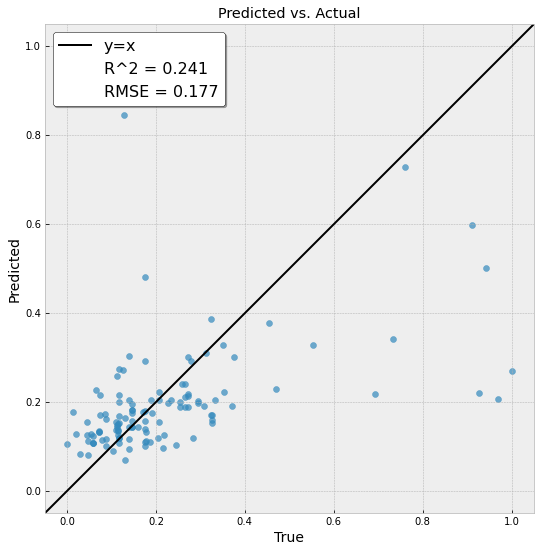

In [61]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
diction = {'actual': test_labels, "pred": predictions}
pva = pd.DataFrame.from_dict(diction)

data_max = max(pva.max())  # Find abs min/max of predicted data
data_min = min(pva.min())

    # Logic to scale the predicted data, using min/max scaling
pva = (pva - data_min) / (data_max - data_min)

r2 = r2_score(pva['actual'], pva['pred'])
rmse = np.sqrt(mean_squared_error(pva['actual'], pva['pred']))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(pva['actual'], pva['pred'], r2, rmse)

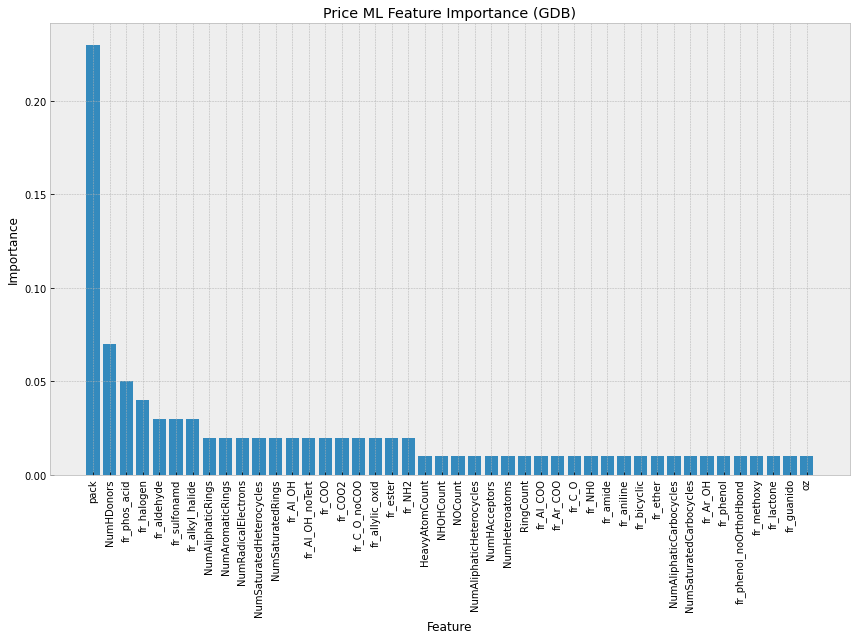

In [62]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()

# Price Model w/ Price divided by Pack


In [23]:
pack_array = np.array(df['pack'])
price_array = np.array(df['price'])

# df['price'] = price_array / pack_array


# df['price'] = [round(i,2) for i in list(df['price'])]
df_ingre_only = df.drop(['active_ingredients', 'inactive_ingredients', 'product',
                         'active_smiles', 'inactive_smiles','product_id','Unnamed: 0',
                         'all_ingredients', 'index'], axis=1)
df_ingre_only.to_csv("hyper_tune_non_norm_price_all.csv")

In [64]:
df.drop(['pack'], axis=1, inplace=True)

## Price Model with Only Ingredients and Manufacturers


In [65]:
df2 = df[['product_id', 'all_ingredients']]

# df2.to_csv("df_pre_01.csv")
df2 = (df2.set_index(['product_id'])
   .apply(lambda x: x.explode())).reset_index()

df2 = df2.set_index('product_id').join(df[['product_id','manufacturer','price']].set_index('product_id')).dropna()
# df2.ingredients = df2.ingredients.str.strip()
# df2 = df2[df2['price'] != "UNKNOWN"].drop(columns=['price'])
df2

,all_ingredients,manufacturer,price
product_id,,,
3392,potassium nitrate,Sensodyne,5.72
3392,sodium fluoride,Sensodyne,5.72
3392,water,Sensodyne,5.72
3392,hydrated silica,Sensodyne,5.72
3392,sorbitol,Sensodyne,5.72
...,...,...,...
994057436,wintergreen oil,Others,11.63
994057436,eucalyptus leaf oil,Others,11.63
994057436,frankinscence oil,Others,11.63


In [66]:
# Creating a Feature Set and Feature List (Names of Features)
priceMap = df[['product_id','price']].set_index("product_id").to_dict()['price']
features = pd.get_dummies(df2).reset_index()
features.drop_duplicates(subset=['product_id'], inplace=True)
features.to_csv("hyper_tune_manufacterer.csv")
labels = np.array(features['product_id'].apply(lambda x: float(priceMap[x])))
features = features.set_index('product_id')
feature_list = list(features.columns)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = randint(low=1, high=50))
features


,price,all_ingredients_ dicalcium phosphate dihydrate,all_ingredients_ glycerin,all_ingredients_ hydrated silica,all_ingredients_ propylene glycol,all_ingredients_ sodium bicarbonate (baking soda),all_ingredients_ sorbitol,all_ingredients_ water,all_ingredients_20,all_ingredients_acacia arabica bark,...,manufacturer_Colgate,manufacturer_Crest,manufacturer_Hello,manufacturer_Jason,manufacturer_Listerine,manufacturer_Others,manufacturer_Parodontax,manufacturer_Rembrandt,manufacturer_Sensodyne,manufacturer_Tom's
product_id,,,,,,,,,,,,,,,,,,,,,
3392,5.72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
200915,1.97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208352,5.72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
217705,4.90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238133,3.66,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976239158,5.92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
980387277,11.51,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
980521313,4.99,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [67]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

108

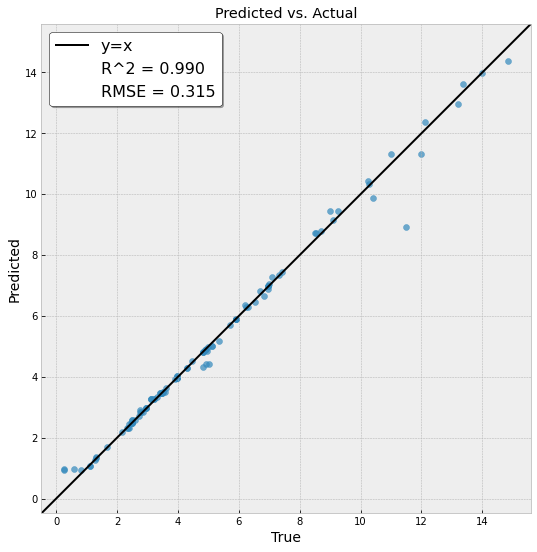

In [68]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

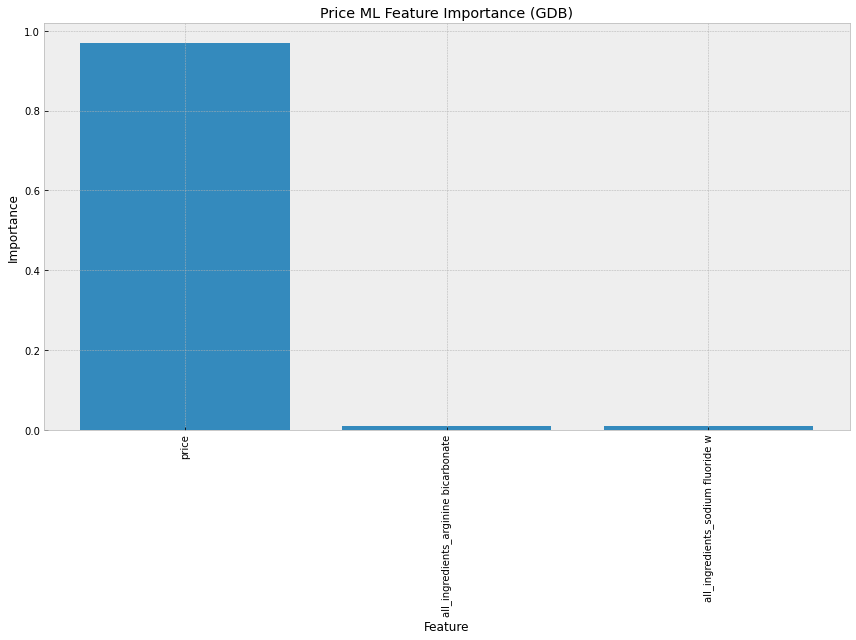

In [69]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()

## Price Model with Only rdkit features


In [70]:
df_ingre_only = df.drop(['active_ingredients', 'inactive_ingredients', 'product',
                         'active_smiles', 'inactive_smiles','product_id','Unnamed: 0',
                         'all_ingredients', 'manufacturer', 'index', 'oz'], axis=1)
# df_ingre_only.to_csv("hyper_tuning_data.csv")

In [71]:
target = np.array(df_ingre_only['price'])
features = df_ingre_only.drop(['price'], axis=1)
feature_list = list(features.columns)
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = randint(low=1, high=50))
test_labels

array([ 0.98, 13.99,  0.97,  5.33, 10.42,  6.89,  2.17,  4.48,  2.5 ,
        7.99,  3.4 ,  0.85,  5.72,  5.72,  2.88,  4.93,  2.17,  5.97,
        3.44, 11.99,  2.97, 13.38,  3.21,  4.82,  2.47,  8.85,  8.5 ,
        5.79,  7.75,  3.97,  3.32,  2.32,  3.97,  5.72,  3.53,  1.97,
        3.48,  4.48,  2.92, 10.01,  4.74,  5.56,  4.82,  8.89,  5.49,
        5.49,  9.29,  5.72,  5.94,  6.97, 12.18,  5.99,  5.1 ,  6.32,
        5.92,  4.82,  3.47,  2.48, 10.  ,  6.81,  5.72, 13.99,  3.94,
        5.92,  7.96,  4.94,  4.84,  3.5 ,  5.92,  7.42,  2.96,  8.4 ,
        5.72,  2.97,  5.98, 14.86,  6.71,  3.48,  5.69, 10.25,  1.24,
        5.72,  6.97,  7.98,  7.  , 12.89,  3.62,  9.25,  3.48,  5.92,
        0.88,  6.47, 12.99,  8.33,  2.97,  3.96,  2.97,  1.96,  4.82,
       10.92,  1.07,  5.3 ,  5.72, 11.63,  6.83,  1.97,  4.11,  1.97,
        8.47,  4.58,  5.97,  4.89,  5.97,  2.49, 11.33, 12.11,  6.95,
       12.11])

In [72]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

118

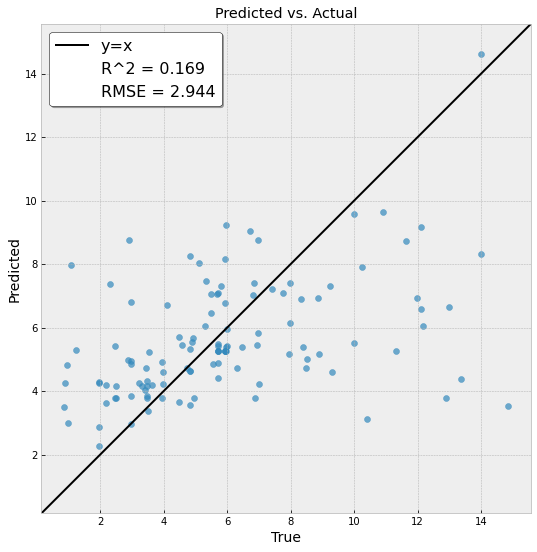

In [73]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

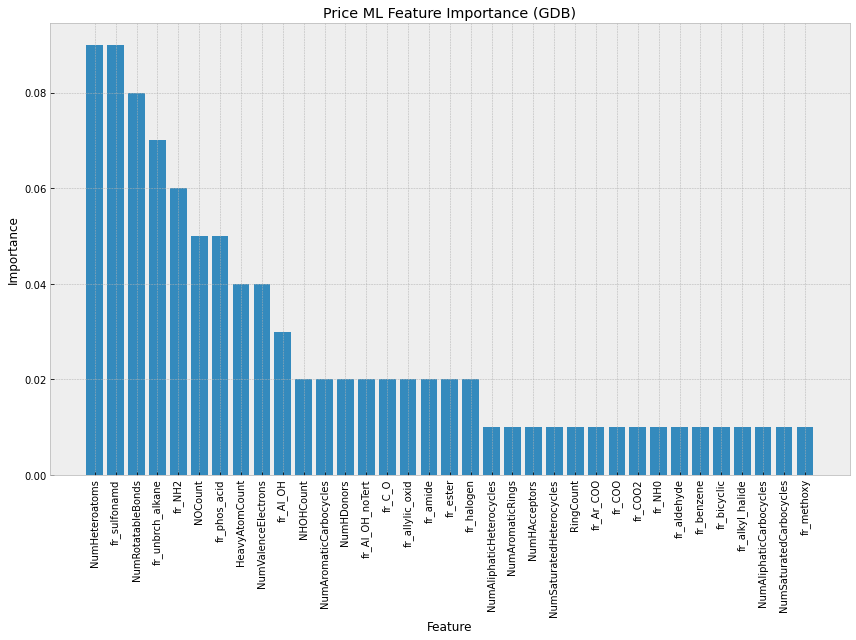

In [74]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()

## Price Model with Oz non normalized


In [75]:
df_ingre_only = df.drop(['active_ingredients', 'inactive_ingredients', 'product',
                         'active_smiles', 'inactive_smiles','product_id','Unnamed: 0',
                         'all_ingredients', 'manufacturer', 'index'], axis=1)
# df_ingre_only.to_csv("hyper_tuning_data.csv")

In [76]:
target = np.array(df_ingre_only['price'])
features = df_ingre_only.drop(['price'], axis=1)
feature_list = list(features.columns)
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = randint(low=1, high=50))
test_labels

array([ 8.99, 12.89,  8.25,  3.96,  1.67,  2.5 ,  5.49,  3.5 ,  0.97,
        1.99,  4.31,  2.82,  6.97,  5.02,  2.96,  2.97,  2.97,  5.92,
        5.92,  5.12,  2.94,  0.97,  3.88,  7.99,  4.76, 10.25,  2.5 ,
        2.96,  2.97,  7.99,  6.96, 10.99,  5.97,  3.97,  6.24,  6.97,
        5.72,  5.94,  3.48,  8.85,  5.49,  5.72,  6.48,  5.72,  7.32,
        5.49,  1.67,  5.5 ,  2.32,  7.99,  2.34,  7.96,  5.12,  3.99,
        1.96,  0.97,  3.48,  4.39,  1.32,  3.66,  0.88,  5.92,  5.72,
        2.72,  2.79,  5.79,  1.3 ,  4.94,  2.39,  6.97,  5.72,  7.2 ,
        1.96,  2.97,  5.92,  9.63,  5.12,  4.48,  5.72, 12.44,  5.92,
        1.96,  2.17,  4.48, 12.34,  2.34,  0.98,  2.49,  3.96, 10.  ,
       19.5 ,  3.97,  5.28,  4.82,  8.99,  9.48,  1.32,  2.58,  4.86,
       11.93, 10.92,  4.79,  2.79,  5.49, 12.34,  5.39,  2.42,  5.12,
        1.5 ,  5.56, 12.44, 10.99,  2.5 ,  1.32,  5.33,  8.89, 13.86,
        9.99])

In [77]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

118

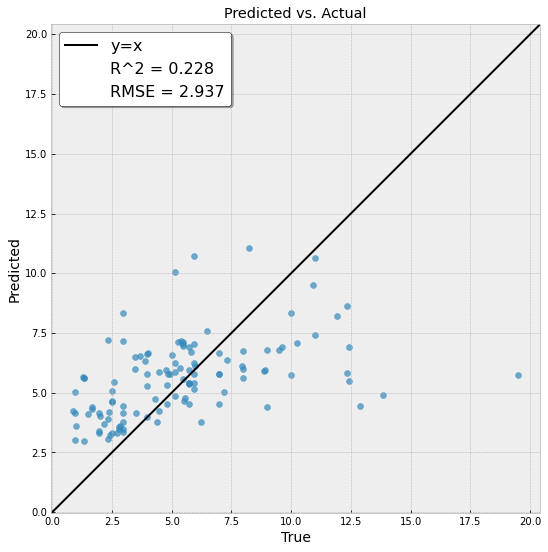

In [78]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

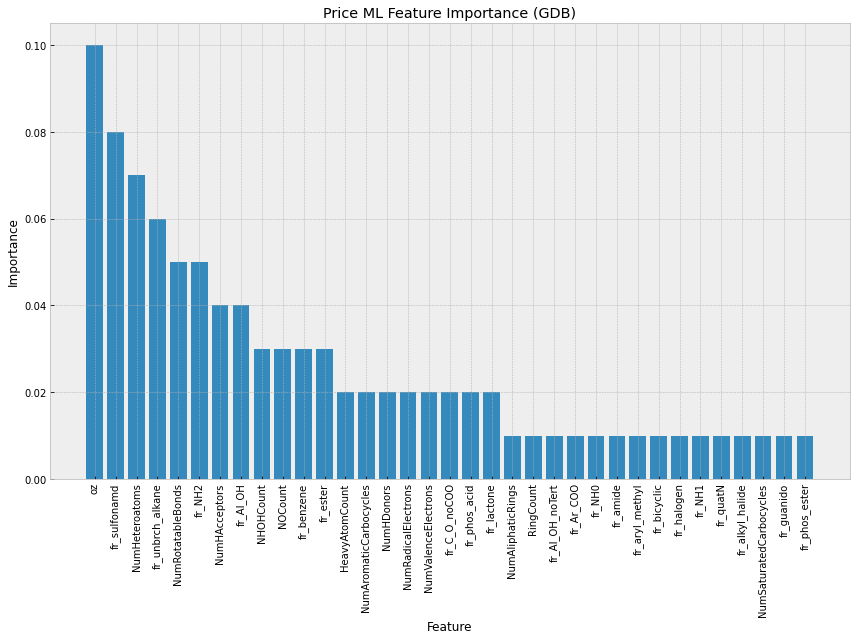

In [79]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()

## Price Model with Oz normalized


In [80]:
df_ingre_only = df.drop(['active_ingredients', 'inactive_ingredients', 'product',
                         'active_smiles', 'inactive_smiles','product_id','Unnamed: 0',
                         'all_ingredients', 'manufacturer', 'index'], axis=1)
df_ingre_only['oz'] = [float(i) for i in df_ingre_only['oz']]
oz_array = np.array(df_ingre_only['oz'])

oz_std = (oz_array - oz_array.min()) / (oz_array.max() -oz_array.min() )
# pack = np.array(df_ingre_only['pack'])

In [81]:
target = np.array(df_ingre_only['price'])
features = df_ingre_only.drop(['price'], axis=1)
for col in features:
    features[col] = df_ingre_only[col]*oz_std

df_ingre_only['oz'] = oz_std
feature_list = list(features.columns)
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = randint(low=1, high=50))


In [82]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

118

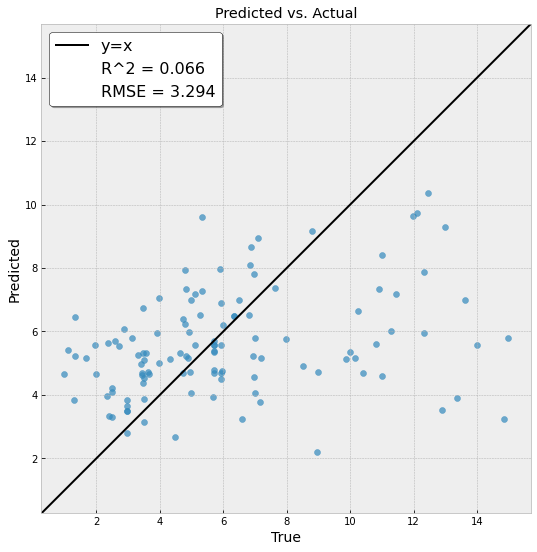

In [83]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

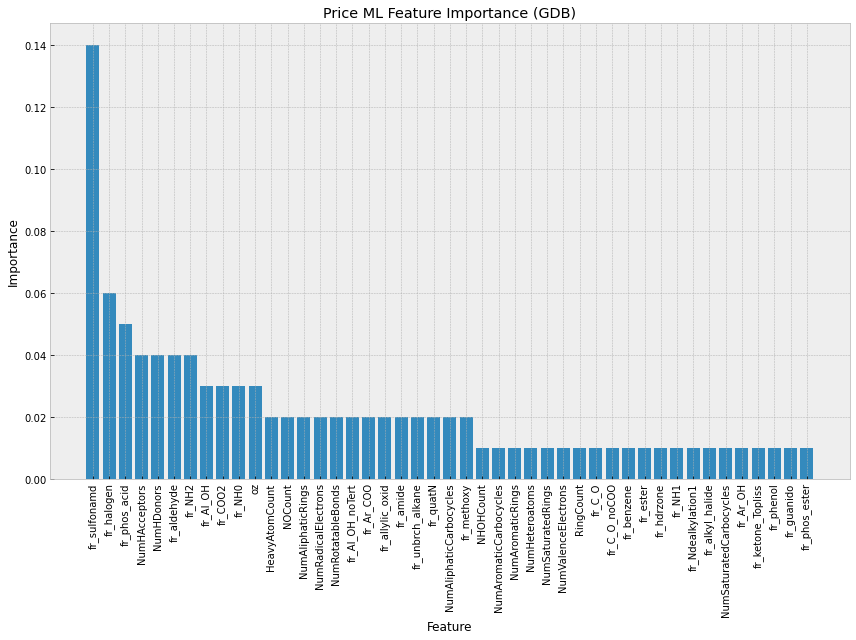

In [84]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()

In [85]:
target = np.array(df_ingre_only['price'])
features = df_ingre_only.drop(['price'], axis=1)
feature_list = list(features.columns)
features = np.array(features)
# Using Skicit-learn to split data into training and testing sets
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size = 0.2, random_state = randint(low=1, high=50))



In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(np.array(train_features))
test_features = scaler.transform(test_features)

In [87]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor# Instantiate model with 1000 decision trees
gdb = GradientBoostingRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
gdb.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = gdb.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
# print('Mean Absolute Error:', round(np.mean(errors), 2), 'Stars.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# print('Accuracy:', round(accuracy, 2), '%.')

# txt = """
# After Training our RF Model, we can test our model using the test set and we see that:
# * Our Mean Absolute Error is: {} Stars
# * Our Model Accuracy is: {} %
# """
# md(txt.format(round(np.mean(errors), 2), round(accuracy, 2)))
len(predictions)

118

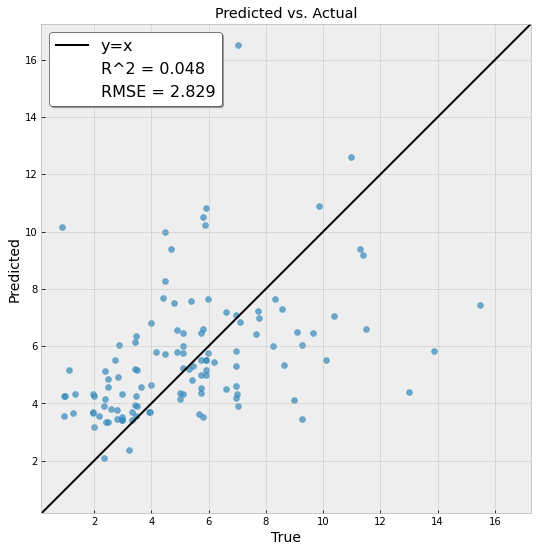

In [88]:
# Fitting with Regression Line
from sklearn.metrics import r2_score
z = np.polyfit(test_labels, predictions, 1)
p = np.poly1d(z)

r2 = r2_score(test_labels, predictions)
rmse = np.sqrt(mean_squared_error(test_labels, predictions))
# f, ax = plt.subplots(figsize=(12,9))
# ax.set_title("Predicted vs Actual Star Ratings")
# ax.set_xlabel("Actual Star Rating")
# ax.set_ylabel("Predicted Star Rating")

# ax.scatter(test_labels, predictions)
# ax.plot(range(1,6), p(range(1,6)), c='black', label='Perfect Fit ')
# tmp = ax.set_xlim(2.8,)
# tmp = ax.set_ylim(2.8,5.2)

grapher(test_labels, predictions, r2, rmse)

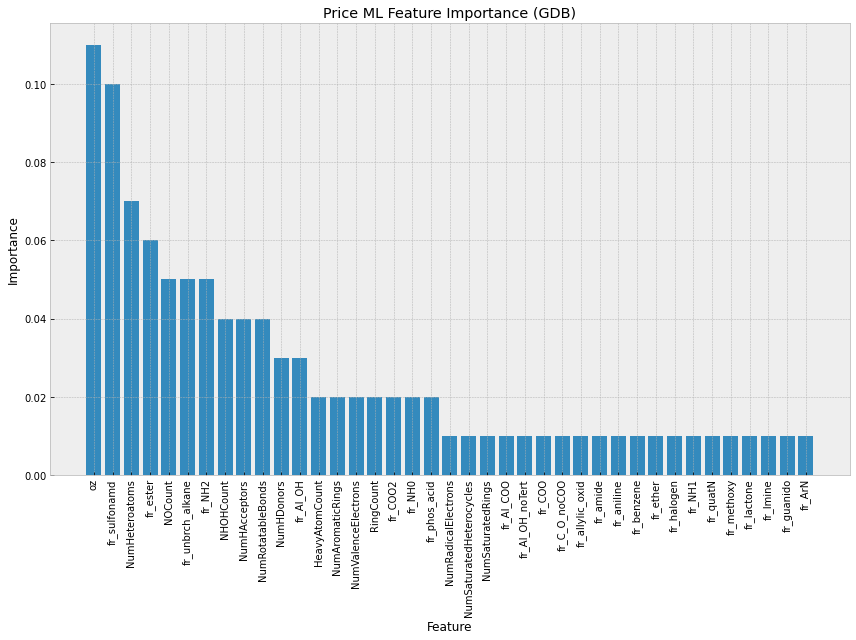

In [89]:
# Get numerical feature importances
importances = list(gdb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
featureImportanceDf = pd.DataFrame(feature_importances,columns=['feature', 'importance'])
featureImportanceDf = featureImportanceDf[featureImportanceDf['importance']>0]
f, ax = plt.subplots(figsize=(12,9))
xvals = range(len(featureImportanceDf['feature']))
ax.bar(xvals, featureImportanceDf['importance'], orientation='vertical')
plt.xticks(xvals, featureImportanceDf['feature'], rotation='vertical')
ax.set_title("Price ML Feature Importance (GDB)")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")
plt.tight_layout()